In [1]:
import numpy as np
from keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import visualkeras

In [2]:
import time
import datetime
import os
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

In [59]:
BATCH_SIZE = 25

In [60]:
#Training data
path = 'C:\\Users\\Eliza Marie\\Anaconda\\fish or not'
#C:\Users\Eliza Marie\Anaconda\train_folder
train_datagen = ImageDataGenerator(rescale=1. / 255)
#change to categorical
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical',
                                         color_mode="rgb",
                                         batch_size=BATCH_SIZE,
                                         seed=7,
                                         shuffle=True)

Found 476 images belonging to 2 classes.


In [61]:
#Validation data
path_test = 'C:\\Users\\Eliza Marie\\Anaconda\\fish or not'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical',
                                         color_mode="rgb",
                                         batch_size=BATCH_SIZE,
                                         seed=7,
                                         shuffle=True)

Found 158 images belonging to 2 classes.


In [6]:
#
type(train)

keras.preprocessing.image.DirectoryIterator

In [7]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [8]:
# 
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 2)
Image Size of first image :  (227, 227, 3)
Output of first image :  (2,)


C:\Users\Eliza Marie\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 1.]')

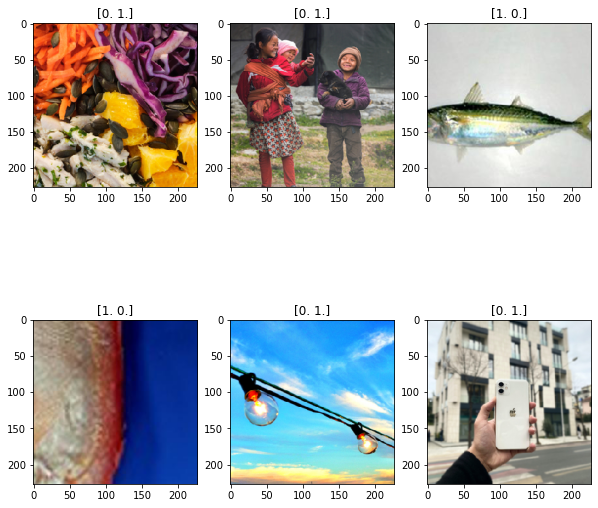

In [9]:
#showing images from training data
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][15])
axs[1][1].set_title(train[0][1][15])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])


In [79]:
#1 AlexNet function definition
def AlexNet(in_shape):
    X_input = Input(in_shape)
    
    # Initialize model
    alexnet = Sequential()
    
    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), strides = 4,name="conv0", input_shape= in_shape,
        padding='valid', kernel_initializer= 'he_normal'))
    alexnet.add(BatchNormalization(axis = 3 , name = "bn0"))
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(3, 3),  padding= 'valid', strides = (2,2),data_format= None, name = 'max0'))
    
    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), strides = 1, padding='same', kernel_initializer= 'he_normal', name = 'conv1'))
    alexnet.add(BatchNormalization(axis = 3 ,name='bn1'))
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(3, 3),padding= 'valid', strides = (2,2),data_format= None, name = 'max1'))
    
    
# Layer 3
    alexnet.add(Conv2D(384, (3, 3), strides = 1, padding='same', kernel_initializer= 'he_normal', name='conv2'))
    alexnet.add(BatchNormalization(axis = 3, name = 'bn2'))
    alexnet.add(Activation('relu'))

# Layer 4
    alexnet.add(Conv2D(384, (3, 3), strides = 1, padding='same',kernel_initializer= 'he_normal', name='conv3'))
    alexnet.add(BatchNormalization(axis = 3, name = 'bn3'))
    alexnet.add(Activation('relu'))
    
# Layer 5
    alexnet.add(Conv2D(256, (3, 3), strides = 1, padding='same', kernel_initializer= 'he_normal', name = 'conv4'))
    alexnet.add(BatchNormalization(axis = 3 ,name='bn4'))
    alexnet.add(Activation('softmax'))
    
    alexnet.add(MaxPooling2D(pool_size=(3, 3),padding= 'valid', strides = (2,2),name = 'max2'))
    #alexnet.add(MaxPooling2D(pool_size=(2, 2),padding= 'valid', strides = 2,name = 'max2'))


    alexnet.add(Flatten())

    #alexnet.add(Dropout(0.5))
    
    alexnet.add(Dense(4096, activation = 'relu', name = "fc0"))
    #alexnet.add(Dense(1024, activation = 'relu', name = "fc0"))

    #alexnet.add(Dropout(0.5))
    
    alexnet.add(Dense(4096, activation = 'relu', name = "fc1"))
    #alexnet.add(Dense(1024, activation = 'relu', name = "fc1"))
    
    #alexnet.add(Dropout(0.5))
    
    alexnet.add(Dense(1000, activation = 'relu'))
    
    alexnet.add(Dense(2, activation = 'softmax', name = "fc2")) #change to softmax later
    
    return alexnet

In [64]:
alexnetModel = AlexNet(train[0][0].shape[1:])

In [65]:
alexnetModel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation_30 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024      
                                                                 
 activation_31 (Activation)  (None, 27, 27, 256)      

In [66]:
alexnetModel.compile(tf.keras.optimizers.Adam(0.001) , loss = 'categorical_crossentropy' , 
                     metrics=['accuracy'])

In [15]:
#5
os.mkdir('./logs4')
os.mkdir('./logs4/fit')

In [57]:
train_num = train.samples
valid_num = test.samples

In [67]:
log_dir="./logs4/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback]

# start training
alexnetModel.fit(train,epochs=8, batch_size = BATCH_SIZE,
        steps_per_epoch=train_num // BATCH_SIZE,
        validation_data=test,
        validation_steps=valid_num // BATCH_SIZE,
        callbacks=callback_list,
        #verbose=0,
        validation_freq=1)

Epoch 1/8
19/19 [==============================] - 42s 2s/step - loss: 0.4622 - accuracy: 0.7627 - val_loss: 2.5638 - val_accuracy: 0.4933
Epoch 2/8
19/19 [==============================] - 39s 2s/step - loss: 0.3153 - accuracy: 0.8825 - val_loss: 4.5158 - val_accuracy: 0.4867
Epoch 3/8
19/19 [==============================] - 39s 2s/step - loss: 0.2171 - accuracy: 0.9180 - val_loss: 3.3997 - val_accuracy: 0.5133
Epoch 4/8
19/19 [==============================] - 39s 2s/step - loss: 0.2320 - accuracy: 0.9091 - val_loss: 2.0727 - val_accuracy: 0.5200
Epoch 5/8
19/19 [==============================] - 41s 2s/step - loss: 0.1942 - accuracy: 0.9113 - val_loss: 4.8514 - val_accuracy: 0.5067
Epoch 6/8
19/19 [==============================] - 39s 2s/step - loss: 0.1834 - accuracy: 0.9335 - val_loss: 7.0099 - val_accuracy: 0.4933
Epoch 7/8
19/19 [==============================] - 40s 2s/step - loss: 0.2621 - accuracy: 0.9224 - val_loss: 1.3613 - val_accuracy: 0.5000
Epoch 8/8
19/19 [==========

In [68]:
alexnetModel.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation_30 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024      
                                                                 
 activation_31 (Activation)  (None, 27, 27, 256)      

In [69]:
#7
alexnetModel.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

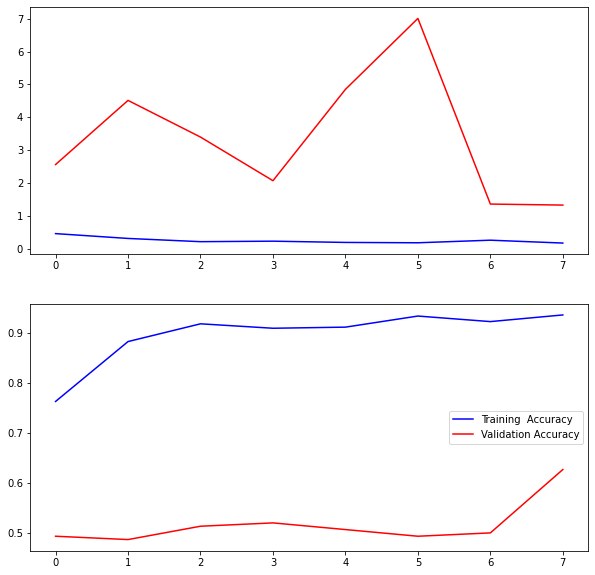

In [70]:
#7
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(alexnetModel.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(alexnetModel.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(alexnetModel.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(alexnetModel.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [71]:
print('Accuracy Score = ',np.max(alexnetModel.history.history['val_accuracy']))

Accuracy Score =  0.6266666650772095


In [32]:
#import keras.backend as K
#K.set_image_data_format('channels_last')

In [72]:
path_test = 'C:\\Users\\Eliza Marie\\Anaconda\\test_folder2'
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 158 images belonging to 1 classes.


In [73]:
predictions = alexnetModel.predict_generator(predict)

C:\Users\ELIZAM~1\AppData\Local\Temp/ipykernel_12620/1066514378.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = alexnetModel.predict_generator(predict)


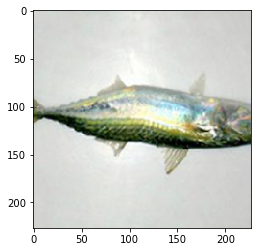

In [74]:
imshow(predict[100][0][0])

In [75]:
values = predictions[100]
#print(predictions[70])
floats = [float(x) for x in values]
print(floats)

[0.9999884366989136, 1.1592276678129565e-05]


In [76]:
import os 
def get_category(predicted_output):
    path ="C:\\Users\\Eliza Marie\\Anaconda\\fish or not"
    return os.listdir(path)[np.argmax(predicted_output)]

In [77]:
print(get_category(predictions[100]))

fish


Text(0.5, 1.0, 'fish')

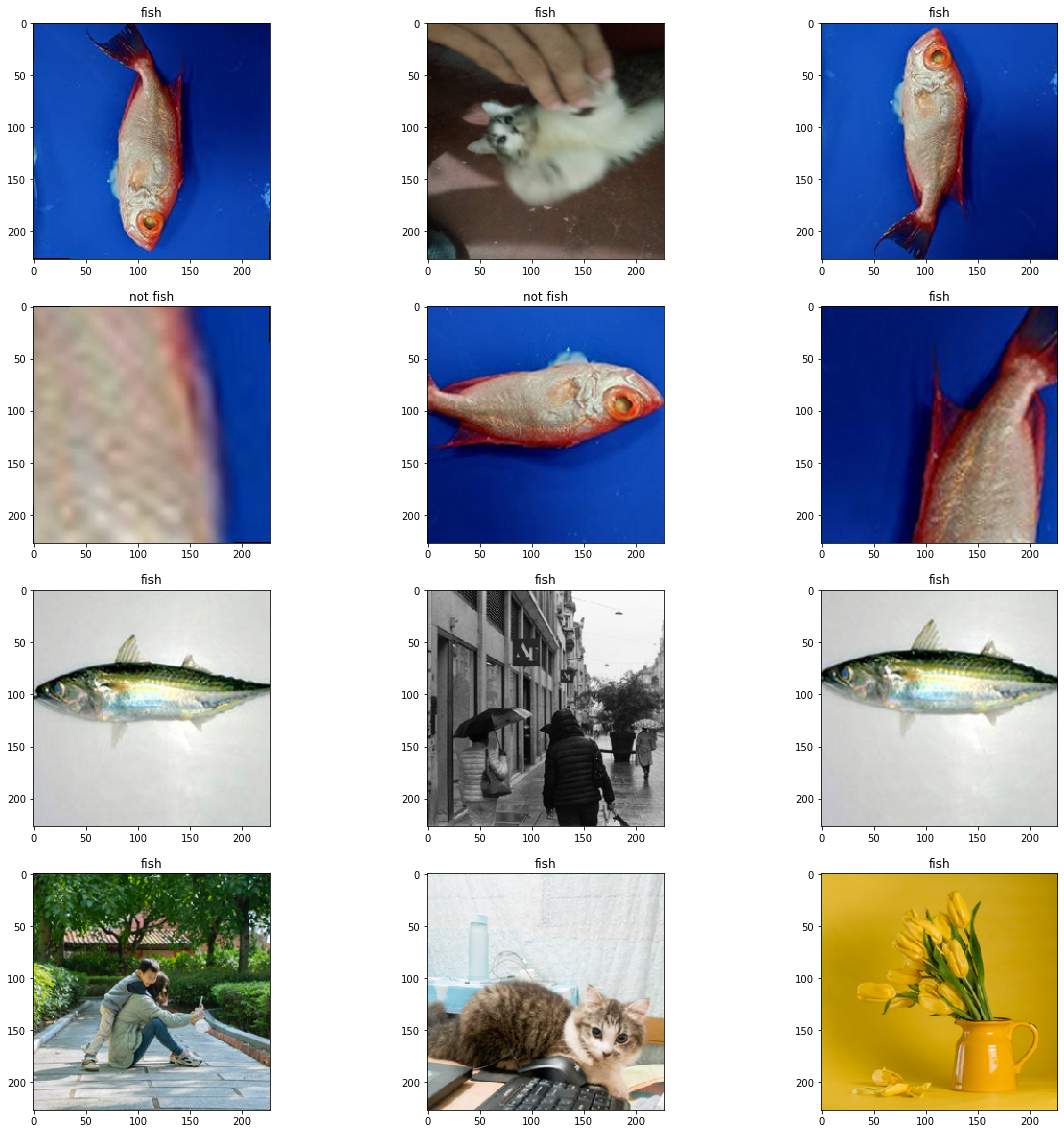

In [78]:
fig , axs = plt.subplots(4,3 ,figsize = (20,20))

axs[0][0].imshow(predict[10][0][0])
axs[0][0].set_title(get_category(predictions[10]))

axs[0][1].imshow(predict[20][0][0])
axs[0][1].set_title(get_category(predictions[20]))

axs[0][2].imshow(predict[30][0][0])
axs[0][2].set_title(get_category(predictions[30]))

axs[1][0].imshow(predict[40][0][0])
axs[1][0].set_title(get_category(predictions[40]))

axs[1][1].imshow(predict[50][0][0])
axs[1][1].set_title(get_category(predictions[50]))

axs[1][2].imshow(predict[153][0][0])
axs[1][2].set_title(get_category(predictions[60]))

axs[2][0].imshow(predict[70][0][0])
axs[2][0].set_title(get_category(predictions[70]))

axs[2][1].imshow(predict[80][0][0])
axs[2][1].set_title(get_category(predictions[80]))

axs[2][2].imshow(predict[90][0][0])
axs[2][2].set_title(get_category(predictions[90]))

axs[3][0].imshow(predict[25][0][0])
axs[3][0].set_title(get_category(predictions[25]))

axs[3][1].imshow(predict[45][0][0])
axs[3][1].set_title(get_category(predictions[45]))

axs[3][2].imshow(predict[65][0][0])
axs[3][2].set_title(get_category(predictions[65]))

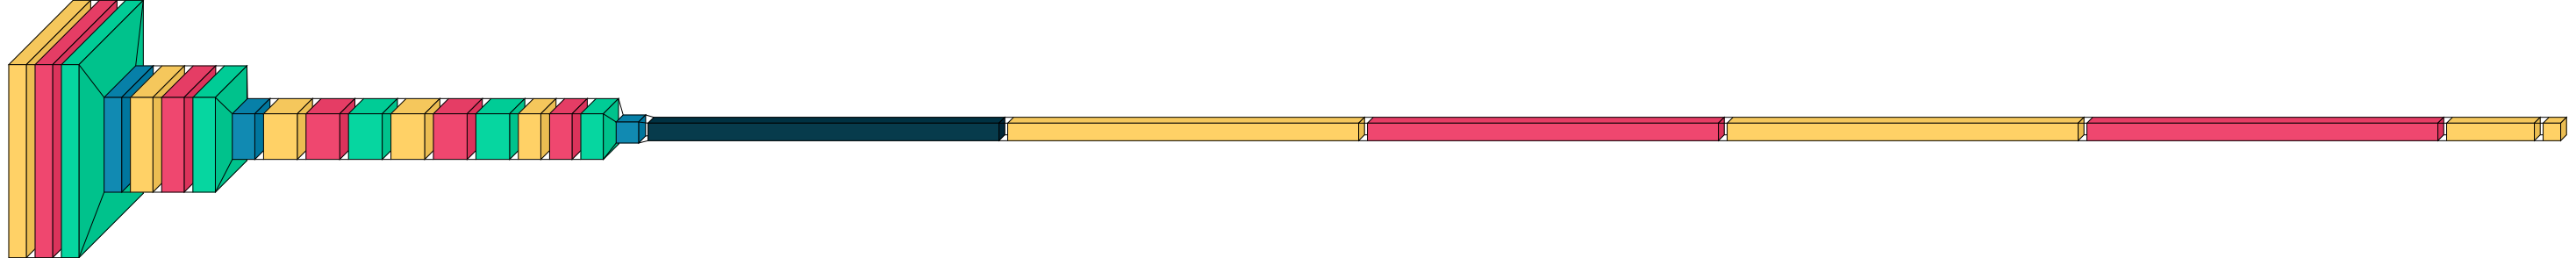

In [30]:
import visualkeras
visualkeras.layered_view(alexnetModel)

In [65]:
alexnetModel.save("final-FishOrNot")

INFO:tensorflow:Assets written to: final-FishOrNot\assets


INFO:tensorflow:Assets written to: final-FishOrNot\assets
